<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/3%20Classification/K_NearestNeighborsWithOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors with OpenCV on MNIST Dataset

In [22]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
from datetime import datetime

In [23]:
def show_random_digits(X, Y, row, col):
    print("The true label is shown in green.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        filter = np.where((Y == i))
        X1, Y1 = X[filter], Y[filter]
        for j in range(col):
            index = np.random.randint(X1.shape[0])
            axarr[i, j].imshow(X1[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y1[index]), fontsize=12, c='g')
    plt.show()

In [24]:
def show_random_result(X, Y, row, col, pred):
    print("The true label is shown in green, and the predicted value is shown within [] in red.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        for j in range(col):
            index = np.random.randint(X.shape[0])
            axarr[i, j].imshow(X[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y[index]), fontsize=12, c='g')
            axarr[i, j].text(10,  1, str(pred[index]), fontsize=12, c='r')
    plt.show()

## Load MNIST Dataset

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
The true label is shown in green.


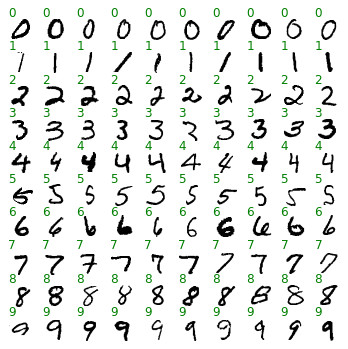

In [25]:
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print('X_train: ' + str(X_train.shape))
    print('y_train: ' + str(y_train.shape))
    print('X_test:  ' + str(X_test.shape))
    print('y_test:  ' + str(y_test.shape))
    show_random_digits(X_train, y_train, 10, 10)

Get the width and height of each digit image

In [26]:
w, h = X_test[0,:,:].shape

OpenCV KNN function requires the data in float32 datatype,
and the data is in 2-dimentional array.
Reshape the X_ dataset and convert to float32
Convert y_ dataset to float32

In [27]:
    X_train = X_train.reshape(X_train.shape[0], w * h).astype(np.float32)
    X_test = X_test.reshape(X_test.shape[0], w * h).astype(np.float32)
    y_train = np.float32(y_train)
    y_test = np.float32(y_test)

Run KNN

In [28]:
    print("Running KNN, it could take about 5 or more minutes...")
    print("start time =", datetime.now().time())
    k = 7
    knn = cv2.ml.KNearest_create()
    knn.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
    _, results, _, _ = knn.findNearest(X_test, k)
    print("end time =", datetime.now().time())

Running KNN, it could take about 5 or more minutes...
start time = 01:03:02.265834
end time = 01:08:13.399471


Format the results to the same shape of y_test

In [29]:
results = np.hstack(results)
print("results:", results.shape)
print("y_test:", y_test.shape)

results: (10000,)
y_test: (10000,)


K= 7
Accuracy Score: 0.9694
Confusion Matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  988    2    1    0    2   16    4    0]
 [   0    3    2  976    1   12    1    7    4    4]
 [   1    8    0    0  945    0    5    1    1   21]
 [   5    0    0    8    2  866    4    1    2    4]
 [   6    3    0    0    3    2  944    0    0    0]
 [   0   25    3    0    1    0    0  989    0   10]
 [   6    4    6   11    7   12    1    6  916    5]
 [   5    6    3    6    8    4    1   11    2  963]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       

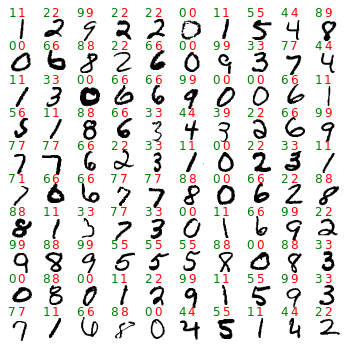

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_test = X_test.reshape(X_test.shape[0], w, h)
y_test = np.uint8(y_test)
results = np.uint8(results)
print("K=", k)
print("Accuracy Score:", accuracy_score(y_test, results))
print("Confusion Matrix:\n", confusion_matrix(y_test, results))
print("Classification Report:\n", classification_report(y_test, results))
show_random_result(X_test , y_test, 10, 10, results)

Show the predicted error digits

y_test(error): (306,)
results(error): (306,)
X_test(error): (306, 28, 28)
The true label is shown in green, and the predicted value is shown within [] in red.


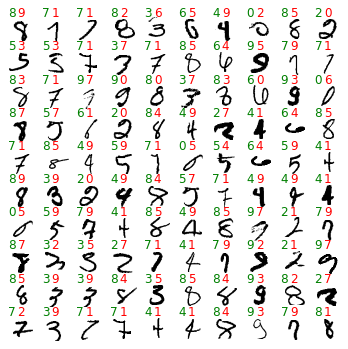

In [31]:
pred_err = np.where(y_test != results)
print("y_test(error):", y_test[pred_err].shape)
print("results(error):", results[pred_err].shape)
print("X_test(error):", X_test[pred_err,:,:][0].shape)
show_random_result(X_test[pred_err,:,:][0] , y_test[pred_err], 10, 10, results[pred_err])